#### Starting Setup

In [1]:
pip install --no-binary :all: aesara

In [ ]:
sectors_tickers = {
        "Commodities": ["GLD", "SLV", "PPLT", "PALL","UNG"],
        "Agriculture": ["CORN", "SOYB", "WEAT"],
        "Crude Oil": ["USO", "BNO"],
        "Technology": ["QQQ", "SMH", "HACK","SKYY","BOTZ"],
        "Finance": ["XLF","KBE", "KRE", "KIE"],
        "Healthcare": ["XLV", "XBI", "PJP","IHI"],
        "Market Benchmark": ["SPY"]
        # Add more sectors and their tickers here
    }

C:\Users\saide\AppData\Local\Temp\ipykernel_7984\2864298455.py:22: FutureWarning: The `testval` argument is deprecated; use `initval`.
  epsilon = pm.HalfCauchy('epsilon', beta=10, testval=1.)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [epsilon, alpha_global, alpha_sector, alpha_etf_Commodities, alpha_etf_Agriculture, alpha_etf_Crude Oil, alpha_etf_Technology, alpha_etf_Finance, alpha_etf_Healthcare, alpha_etf_Market Benchmark]


Sampling 4 chains for 500 tune and 1_000 draw iterations (2_000 + 4_000 draws total) took 2793 seconds.
The rhat statistic is larger than 1.01 for some parameters. This indicates problems during sampling. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details
There were 942 divergences after tuning. Increase `target_accept` or reparameterize.
Chain 0 reached the maximum tree depth. Increase `max_treedepth`, increase `target_accept` or reparameterize.
Chain 1 reached the maximum tree depth. Increase `max_treedepth`, increase `target_accept` or reparameterize.
Chain 2 reached the maximum tree depth. Increase `max_treedepth`, increase `target_accept` or reparameterize.


array([[<Axes: title={'center': 'alpha_global'}>,
        <Axes: title={'center': 'alpha_global'}>],
       [<Axes: title={'center': 'alpha_sector'}>,
        <Axes: title={'center': 'alpha_sector'}>],
       [<Axes: title={'center': 'alpha_etf_Commodities'}>,
        <Axes: title={'center': 'alpha_etf_Commodities'}>],
       [<Axes: title={'center': 'alpha_etf_Agriculture'}>,
        <Axes: title={'center': 'alpha_etf_Agriculture'}>],
       [<Axes: title={'center': 'alpha_etf_Crude Oil'}>,
        <Axes: title={'center': 'alpha_etf_Crude Oil'}>],
       [<Axes: title={'center': 'alpha_etf_Technology'}>,
        <Axes: title={'center': 'alpha_etf_Technology'}>],
       [<Axes: title={'center': 'alpha_etf_Finance'}>,
        <Axes: title={'center': 'alpha_etf_Finance'}>],
       [<Axes: title={'center': 'alpha_etf_Healthcare'}>,
        <Axes: title={'center': 'alpha_etf_Healthcare'}>],
       [<Axes: title={'center': 'alpha_etf_Market Benchmark'}>,
        <Axes: title={'center': 'alp

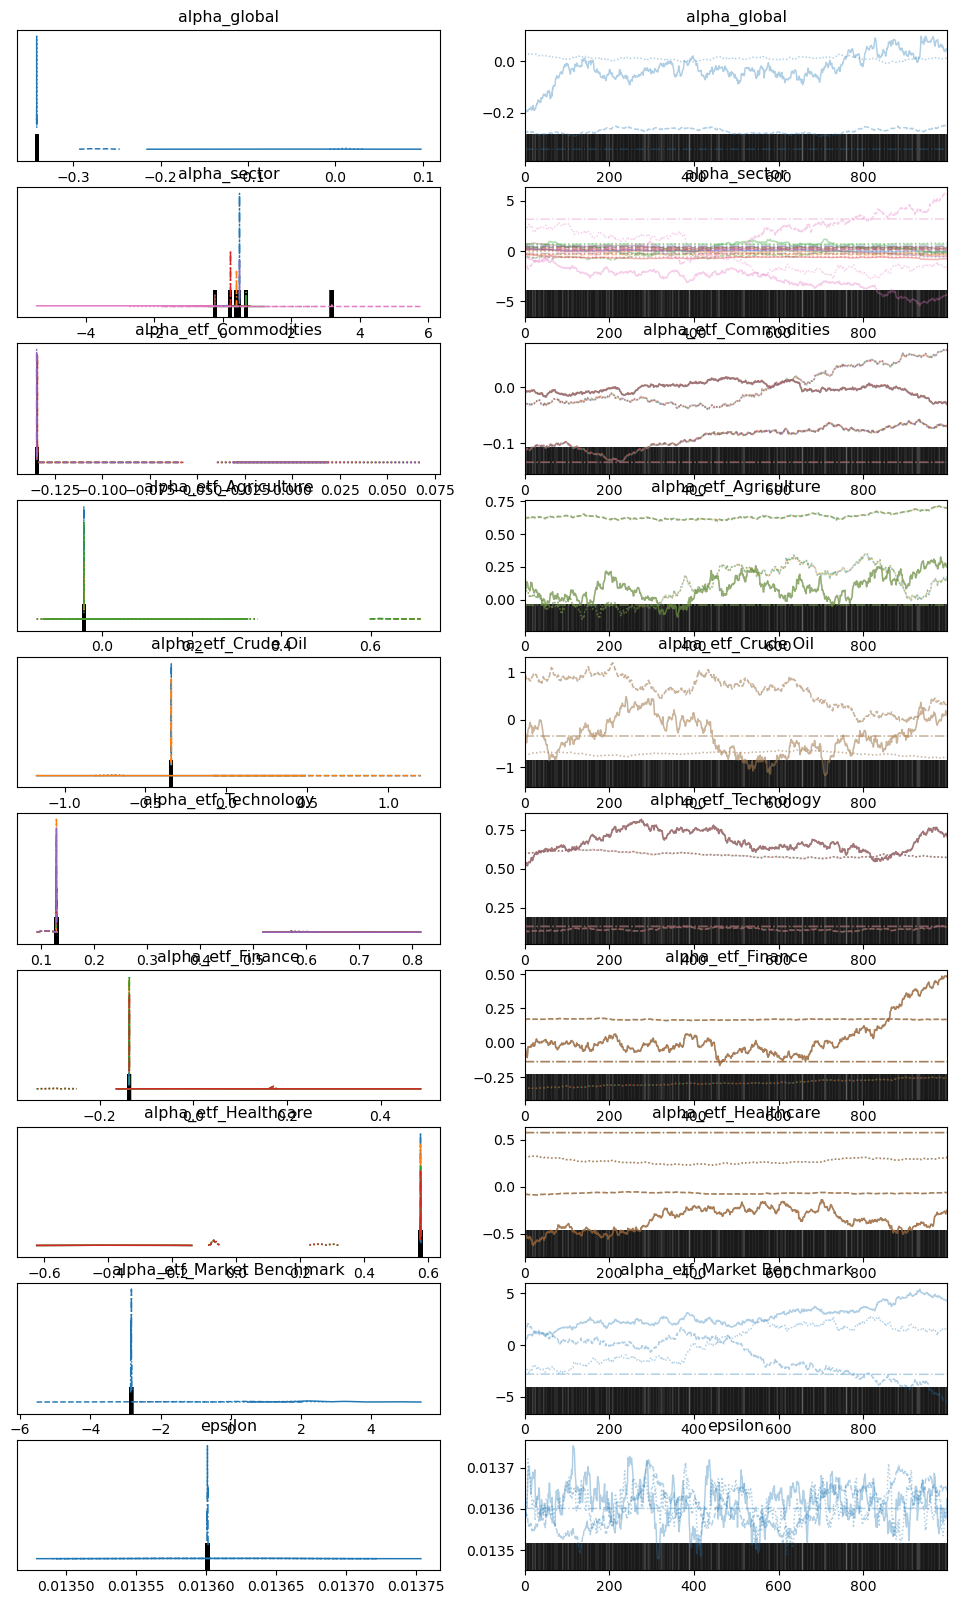

In [9]:
import pandas as pd
import pymc as pm
import aesara.tensor as at
import arviz as az


# Load your data
df = pd.read_excel('etf_ei_merged_data.xlsx')

sectors_tickers = {
    "Commodities": ["GLD", "SLV", "PPLT", "PALL","UNG"],
    "Agriculture": ["CORN", "SOYB", "WEAT"],
    "Crude Oil": ["USO", "BNO"],
    "Technology": ["QQQ", "SMH", "HACK","SKYY","BOTZ"],
    "Finance": ["XLF","KBE", "KRE", "KIE"],
    "Healthcare": ["XLV", "XBI", "PJP","IHI"],
    "Market Benchmark": ["SPY"]
}

with pm.Model() as model:
    # Priors
    epsilon = pm.HalfCauchy('epsilon', beta=10, testval=1.)
    alpha_global = pm.Normal('alpha_global', mu=0, sigma=10)
    alpha_sector = pm.Normal('alpha_sector', mu=0, sigma=10, shape=len(sectors_tickers))
    
    obs = []
    for i, (sector, tickers) in enumerate(sectors_tickers.items()):
        alpha_etf = pm.Normal(f'alpha_etf_{sector}', mu=0, sigma=10, shape=len(tickers))
        
        for j, ticker in enumerate(tickers):
            mu = alpha_global + alpha_sector[i] + alpha_etf[j]
            ticker_data = df[df['Ticker'] == ticker]['daily_return']
            
            # Likelihood
            obs.append(pm.Normal(f'returns_{ticker}', mu=mu, sigma=epsilon, observed=ticker_data))
    
    # Sampling
    trace = pm.sample(1000, tune=500, target_accept=0.95)

# Posterior Analysis
az.plot_trace(trace)


In [16]:
pip install --upgrade arviz

Note: you may need to restart the kernel to use updated packages.


In [10]:
pip install arviz

Note: you may need to restart the kernel to use updated packages.


In [1]:
pip install "arviz[all]"

  Obtaining dependency information for netcdf4 from https://files.pythonhosted.org/packages/f0/ef/39f1e32c623abbcff8fef81e484abafc74779388144540b804d96f0657cc/netCDF4-1.6.4-cp311-cp311-win_amd64.whl.metadata
     ---------------------------------------- 0.0/18.5 MB ? eta -:--:--
     ---------------------------------------- 0.0/18.5 MB ? eta -:--:--
     ---------------------------------------- 0.0/18.5 MB ? eta -:--:--
     --------------------------------------- 0.0/18.5 MB 217.9 kB/s eta 0:01:25
     --------------------------------------- 0.1/18.5 MB 363.1 kB/s eta 0:00:51
     --------------------------------------- 0.1/18.5 MB 504.4 kB/s eta 0:00:37
     --------------------------------------- 0.2/18.5 MB 701.4 kB/s eta 0:00:27
      -------------------------------------- 0.3/18.5 MB 980.4 kB/s eta 0:00:19
      -------------------------------------- 0.3/18.5 MB 905.4 kB/s eta 0:00:21
      --------------------------------------- 0.4/18.5 MB 1.0 MB/s eta 0:00:18
      -----------

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [ ]:
import pandas as pd
import pymc as pm
import aesara.tensor as at
import arviz as az

# Load your data
df = pd.read_excel('etf_ei_merged_data.xlsx')

sectors_tickers = {
    "Commodities": ["GLD", "SLV", "PPLT", "PALL","UNG"],
    "Agriculture": ["CORN", "SOYB", "WEAT"],
    "Crude Oil": ["USO", "BNO"],
    "Technology": ["QQQ", "SMH", "HACK","SKYY","BOTZ"],
    "Finance": ["XLF","KBE", "KRE", "KIE"],
    "Healthcare": ["XLV", "XBI", "PJP","IHI"],
    "Market Benchmark": ["SPY"]
}
with pm.Model() as model:
    epsilon = pm.HalfCauchy('epsilon', beta=10, testval=1.)
    alpha_global = pm.Normal('alpha_global', mu=0, sigma=10)
    alpha_sector = pm.Normal('alpha_sector', mu=0, sigma=10, shape=len(sectors_tickers))
    
    # Include economic indicators as covariates (optional but can improve model)
    bci_coef = pm.Normal('bci_coef', mu=0, sigma=1)
    cci_coef = pm.Normal('cci_coef', mu=0, sigma=1)
    cli_coef = pm.Normal('cli_coef', mu=0, sigma=1)
    
    for i, (sector, tickers) in enumerate(sectors_tickers.items()):
        alpha_etf = pm.Normal(f'alpha_etf_{sector}', mu=0, sigma=10, shape=len(tickers))
        
        for j, ticker in enumerate(tickers):
            subset_data = df[df['Ticker'] == ticker]
            mu = (alpha_global + alpha_sector[i] + alpha_etf[j] +
                  bci_coef * subset_data['bci'] + 
                  cci_coef * subset_data['cci'] + 
                  cli_coef * subset_data['cli'])
            
            # Likelihood
            pm.Normal(f'returns_{ticker}', mu=mu, sigma=epsilon, observed=subset_data['daily_return'])
    
    # Sampling
    trace = pm.sample(1000, tune=500, target_accept=0.95)

# Convert the PyMC3 trace to an ArviZ InferenceData object
idata = az.from_pymc3(trace)

# Visualizing the trace
az.plot_trace(idata)

# Summary statistics
summary = az.summary(idata)
print(summary)


C:\Users\saide\AppData\Local\Temp\ipykernel_32084\1699316296.py:19: FutureWarning: The `testval` argument is deprecated; use `initval`.
  epsilon = pm.HalfCauchy('epsilon', beta=10, testval=1.)
C:\Users\saide\anaconda3\envs\pymc_env\Lib\site-packages\multipledispatch\dispatcher.py:27: AmbiguityWarning: 
Ambiguities exist in dispatched function _unify

The following signatures may result in ambiguous behavior:
	[object, ConstrainedVar, Mapping], [ConstrainedVar, Var, Mapping]
	[object, ConstrainedVar, Mapping], [ConstrainedVar, object, Mapping]
	[ConstrainedVar, Var, Mapping], [object, ConstrainedVar, Mapping]
	[object, ConstrainedVar, Mapping], [ConstrainedVar, object, Mapping]


Consider making the following additions:

@dispatch(ConstrainedVar, ConstrainedVar, Mapping)
def _unify(...)

@dispatch(ConstrainedVar, ConstrainedVar, Mapping)
def _unify(...)

@dispatch(ConstrainedVar, ConstrainedVar, Mapping)
def _unify(...)

@dispatch(ConstrainedVar, ConstrainedVar, Mapping)
def _unify(...